In [14]:
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [15]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data();
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


(10000, 1)

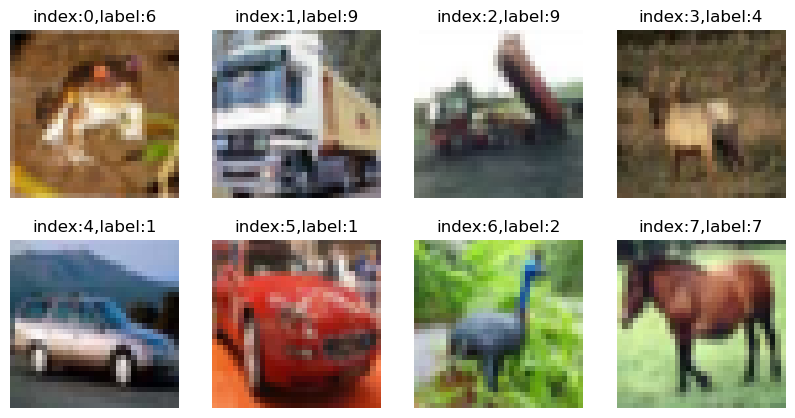

In [17]:
plt.figure(figsize=(10,5))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"index:{i},label:{y_train[i][0]}")
    plt.axis("off")

plt.show()

In [19]:
#indirgeme
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [66]:
model=Sequential()

model.add(Flatten(input_shape=(32,32,3)))#dfyi npye dönüştürüyo

model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(10,activation="softmax")) #output

In [67]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,103,818 (8.03 MB)

 Trainable params: 2,103,818 (8.03 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [69]:
#erken durdurma
early_stopping=EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)
#en iyi modelin kaydı point
checkpoint=ModelCheckpoint("en_iyi_Ann.keras",monitor="val_loss",save_best_only=True)

In [70]:
#train işlemi
history=model.fit(x_train,y_train,
                 epochs=15,
                 batch_size=60,
                 validation_split=0.2,
                 callbacks=[early_stopping,checkpoint])

Epoch 1/15
667/667 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.2152 - loss: 2.0680 - val_accuracy: 0.3217 - val_loss: 1.8574
Epoch 2/15
667/667 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.3412 - loss: 1.8068 - val_accuracy: 0.3758 - val_loss: 1.7310
Epoch 3/15
667/667 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.3773 - loss: 1.7161 - val_accuracy: 0.3941 - val_loss: 1.6878
Epoch 4/15
667/667 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.4034 - loss: 1.6393 - val_accuracy: 0.4151 - val_loss: 1.6442
Epoch 5/15
667/667 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.4236 - loss: 1.5807 - val_accuracy: 0.4154 - val_loss: 1.6395
Epoch 6/15
667/667 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.4480 - loss: 1.5325 - val_accuracy: 0.4482 - val_loss: 1.5513
Epoch 7/15
667/667 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.4623 - loss: 1.4893 - val_accuracy: 0.4527 - val_loss: 1.5185
Epoch 8/15
667/667 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.4744 - loss: 1.4589 - 

In [71]:
test_loss,test_acc=model.evaluate(x_test,y_test)
test_loss,test_acc
history.history

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5174 - loss: 1.3655


{'accuracy': [0.2639000117778778,
  0.35032498836517334,
  0.3812499940395355,
  0.4088999927043915,
  0.430649995803833,
  0.44897499680519104,
  0.46492499113082886,
  0.47562500834465027,
  0.48912501335144043,
  0.49900001287460327,
  0.5079249739646912,
  0.5175999999046326,
  0.5265750288963318,
  0.5374000072479248,
  0.5426250100135803],
 'loss': [1.9673995971679688,
  1.7822874784469604,
  1.6969374418258667,
  1.630258321762085,
  1.572205901145935,
  1.528352975845337,
  1.485616683959961,
  1.4543821811676025,
  1.4190471172332764,
  1.392547607421875,
  1.3640516996383667,
  1.343428134918213,
  1.3148987293243408,
  1.2929481267929077,
  1.2730299234390259],
 'val_accuracy': [0.32170000672340393,
  0.3758000135421753,
  0.39410001039505005,
  0.41510000824928284,
  0.4153999984264374,
  0.448199987411499,
  0.4526999890804291,
  0.4674000144004822,
  0.47609999775886536,
  0.48649999499320984,
  0.48420000076293945,
  0.5002999901771545,
  0.49390000104904175,
  0.4966999

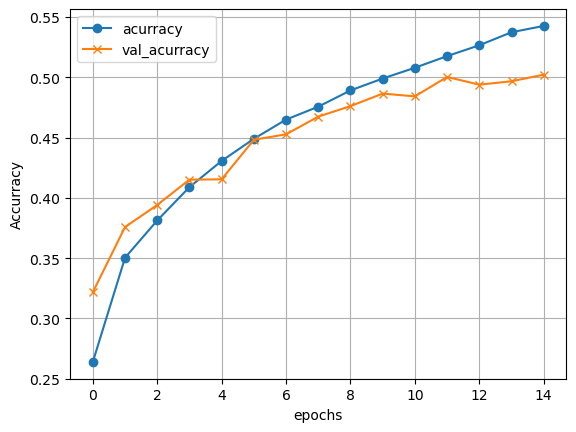

In [72]:
plt.figure()
plt.plot(history.history["accuracy"],marker="o",label="acurracy")
plt.plot(history.history["val_accuracy"],marker="x",label="val_acurracy")
plt.xlabel("epochs")
plt.ylabel("Accurracy")
plt.legend()
plt.grid()
plt.show()

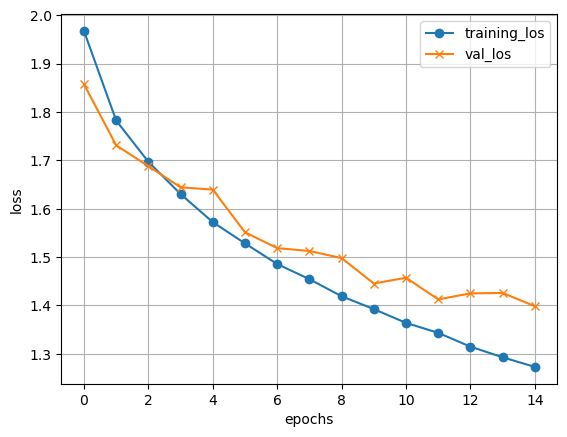

In [73]:
plt.figure()
plt.plot(history.history["loss"],marker="o",label="training_los")
plt.plot(history.history["val_loss"],marker="x",label="val_los")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()